In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn import svm
import pandas as pd
import os
import scipy as sc

In [12]:
# get the annotated data to build the classifier
direc = r'C:\Users\Daniellab\Desktop\Light_level_videos_c-10\Data\Step3\Annotation'
file = pd.read_csv(direc + '\Mahad_ManualAnnotation_pooledAllDataTogether.csv')

Check the distribution of the true and false trials

In [13]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

k2_test, p_test = sc.stats.normaltest(s, axis=0, nan_policy='omit')
print("p = {:g}".format(p_test))

if p_test < 0.05: # null hypothesis - the distribution is normally distributed; less than alpha - reject null hypothesis
    print('This random distribution is not normally distributed')
else:
    print('This random distribution is normally distributed')

p = 0.476825
This random distribution is normally distributed


In [14]:
trueTrials = file.FramesInView[file.TrialStatus == 1]

k2_true, p_true = sc.stats.normaltest(np.log(trueTrials), axis=0, nan_policy='omit')
print("p = {:g}".format(p_true))

if p_true < 0.05: # null hypothesis - the distribution is normally distributed; less than alpha - reject null hypothesis
    print('the true trials are not normally distributed')
else:
    print('The true trials are normally distributed')

p = 0.045632
the true trials are not normally distributed


In [15]:
falseTrials = file.FramesInView[file.TrialStatus == 0]

k2_false, p_false = sc.stats.normaltest(np.log(falseTrials), axis=0, nan_policy='omit')
print("p = {:g}".format(p_false)) 

if p_false < 0.05: # null hypothesis - the distribution is normally distributed; less than alpha - reject null hypothesis
    print('the false trials are not normally distributed')
else:
    print('The false trials are normally distributed')

p = 0.000107942
the false trials are not normally distributed


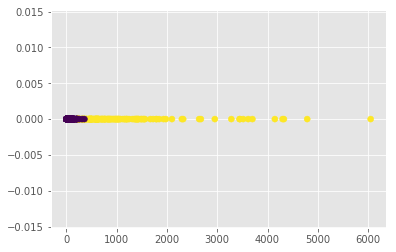

In [16]:
x = np.asarray(file.FramesInView)
y = np.zeros(len(x))
data = np.transpose(np.array([x,y]))
Manual_Label = np.asarray(file.TrialStatus)

plt.scatter(data[:,0],data[:,1], c = Manual_Label) #see what the data looks like

In [17]:
# build the linear classifier
clf = svm.SVC(kernel = 'linear', C = 1.0)
clf.fit(data,Manual_Label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [18]:
w = clf.coef_[0]
y0 = clf.intercept_

new_line = w[0]*data[:,0] - y0
new_line.shape

(573,)

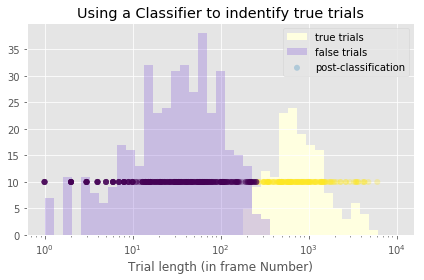

In [19]:
# see what the classifier did to the labels - find a way to draw a line along the "point" and draw "margin"

plt.hist(trueTrials, bins =10**np.linspace(0, 4, 40), color = 'lightyellow', label = 'true trials', zorder=0)
plt.hist(falseTrials, bins =10**np.linspace(0, 4, 40), color = 'mediumpurple', alpha=0.35, label = 'false trials', zorder=5)

annotation = []
for x,_ in data:
    YY = clf.predict([[x,0]])[0]
    annotation.append(YY)

plt.scatter(data[:,0],data[:,1]+10, c = annotation, 
            alpha=0.3, edgecolors='none', zorder=10, label = 'post-classification')
# plt.plot(new_line)
plt.xscale("log")
plt.yscale('linear')
plt.xlabel('Trial length (in frame Number)')
plt.title('Using a Classifier to indentify true trials')
plt.legend()
# plt.savefig(r'C:\Users\Daniellab\Desktop\Light_level_videos_c-10\Data\Step3\Annotation\Figuers_3.svg')
plt.tight_layout()

In [22]:
# run the predictor for all dataset and annotate them
direc = r'C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Old\Old_TanviMethod_2'
new_path = r'C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Old\Old_Step3'

file = [file for file in os.listdir(direc) if file.endswith('.csv')]
# test = file[0]

for item in file:
    print(item)
    df = pd.read_csv(direc + '/' + item)
    label = []
    # run the classifer on this
    for xx in df.Frames_In_View:
        print(xx)
        YY = clf.predict([[xx,0]])[0]
        label.append(YY)

    df1 = pd.DataFrame({'label': label})
    new_df = pd.concat([df, df1], axis = 1)
    new_df.to_csv(new_path + '/' + item[:-4] + '_labeled.csv')

Step1_Tanvi_MethodL0.1_c-3_m32_MothInOut.csv
73
8
3
7
9
32
1331
34
643
13
63
36
59
28
13
73
5
9
20
28
113
443
9
70
5809
883
10
10
2156
671
1
864
1
1530
979
555
83
185
1312
1286
52
17
1627
14
4
759
15
124
77
20
418
54
6
14
1079
17
27
131
109
4
735
746
17
10
1
50
46
51
962
11
9
14
199
450
257
916
17
25
13
87
115
41
1
55
21
Step1_Tanvi_MethodL0.1_c-3_m34_MothInOut.csv
4299
2567
345
11
39
25
1464
176
791
537
1719
334
414
12
639
1679
439
2760
753
12
101
35
35
245
51
28
29
2424
198
4
105
44
64
6
107
1607
31
413
516
6
426
8
689
164
2357
375
48
32
17
20
22
20
5
1189
599
86
1292
1583
2029
78
51
23
16
Step1_Tanvi_MethodL0.1_c-3_m37_MothInOut.csv
115
170
4
2657
1295
28
1733
138
14
648
11
198
325
1
114
625
160
300
37
180
17
Step1_Tanvi_MethodL0.1_c-3_m38_MothInOut.csv
5582
61
407
76
2
10
1
1268
1588
36
23
1450
471
691
89
305
7
321
79
22
276
264
793
22
6
6
68
9
120
79
9
3
108
17
82
10
1
47
6
6
3
10
14
50
11
52
19
83
33
21
26
37
57
56
18
22
54
56
58
34
14
19
33
1004
187
1375
18
13
9
4
18
77
9
22
25


In [ ]:
# run the predictor for all dataset and annotate them
direc = r'C:\Users\Daniellab\Desktop\Light_level_videos_c-10\Data\Step2'
new_path = r'C:\Users\Daniellab\Desktop\Light_level_videos_c-10\Data\Step3'

file = [file for file in os.listdir(direc) if file.endswith('.csv')]
# test = file[0]

for item in file:
    print(item)
    df = pd.read_csv(direc + '/' + item)
    label = []
    # run the classifer on this
    for xx in df.Frames_In_View:
        print(xx)
        YY = clf.predict([[xx,0]])[0]
        label.append(YY)

    df1 = pd.DataFrame({'label': label})
    new_df = pd.concat([df, df1], axis = 1)
    new_df.to_csv(new_path + '/' + item[:-4] + '_labeled.csv')